In [526]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup
import requests

In [194]:
#Load the dataset into a DataFrame.
data = pd .read_csv('airports.csv')

In [196]:
df=pd.DataFrame(data)

### Section 1: Data Manipulation with Pandas
Understanding the Dataset


In [198]:
#Display the first 5 rows.
df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [22]:
#Print the DataFrame's shape, 
df.shape 


(322, 7)

In [38]:
#info and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


## Data Cleaning
Check for missing values in 'IATA_CODE', 'CITY', 'STATE', and 'COUNTRY'.
Fill missing 'LATITUDE' and 'LONGITUDE' values with the column median.


In [47]:
df.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [49]:
df['LATITUDE'].median()

39.29761

In [51]:
df['LONGITUDE'].median()

-93.40307

In [59]:
df['LATITUDE']=df['LATITUDE'].fillna(df['LATITUDE'].median())

In [63]:
df['LONGITUDE']=df['LONGITUDE'].fillna(df['LONGITUDE'].median())

In [65]:
df.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

## Filtering and Sorting
Filter the dataset to show only airports in the United States.
Sort the results alphabetically by the airport name.

## Handling Duplicates
Check for duplicate rows based on 'IATA_CODE'.
Drop any duplicate entries if found.


In [99]:
df['IATA_CODE'].duplicated().sum()

0

In [101]:
df.duplicated().sum()

0

In [103]:
# NO duplicate data found

## Merging DataFrames
Create a small DataFrame with 'STATE' and 'Region' columns only(e.g., West, Midwest).
Merge this DataFrame with the original airport data.

In [106]:
data2={'STATE':('West'),'Region':('Midwest')}

In [122]:
df2=pd.DataFrame(data2,index=[0])

In [134]:
df2.head()

,STATE,Region
0,West,Midwest


In [190]:
df=pd.merge(df,df2,on='STATE',how='inner')

In [200]:
df

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [142]:
# Here we have merged STATE and Region columns after creating the new data frame.

## Section 2: Data Analysis and Aggregation
Grouping and Aggregating Data


## Group the data by 'STATE' and count the number of airports in each state.
Sort and display the top 5 states with the most airports.

In [447]:
Airport=df.groupby('STATE')['AIRPORT'].count()
Airport

STATE
AK    19
AL     5
AR     4
AS     1
AZ     4
CA    22
CO    10
CT     1
DE     1
FL    17
GA     7
GU     1
HI     5
IA     5
ID     6
IL     7
IN     4
KS     4
KY     4
LA     7
MA     5
MD     1
ME     2
MI    15
MN     8
MO     5
MS     5
MT     8
NC     8
ND     8
NE     3
NH     1
NJ     3
NM     4
NV     3
NY    14
OH     5
OK     3
OR     5
PA     8
PR     3
RI     1
SC     4
SD     3
TN     5
TX    24
UT     5
VA     7
VI     2
VT     1
WA     4
WI     8
WV     1
WY     6
Name: AIRPORT, dtype: int64

In [457]:
Airport.sort_values(ascending=False).head()

STATE
TX    24
CA    22
AK    19
FL    17
MI    15
Name: AIRPORT, dtype: int64

## Identifying Trends
Calculate the average latitude and longitude for airports by state.
Plot the results on a scatter plot.


In [308]:
avg=df.groupby(['STATE','AIRPORT']).agg({'LATITUDE':'mean','LONGITUDE':'mean'})

In [314]:
avg.reset_index()

,STATE,AIRPORT,LATITUDE,LONGITUDE
0,AK,Adak Airport,51.87796,-176.64603
1,AK,Bethel Airport,60.77978,-161.83800
2,AK,Deadhorse Airport (Prudhoe Bay Airport),70.19476,-148.46516
3,AK,Dillingham Airport,59.04541,-158.50334
4,AK,Fairbanks International Airport,64.81368,-147.85967
...,...,...,...,...
317,WY,Jackson Hole Airport,43.60732,-110.73774
318,WY,Laramie Regional Airport,41.31205,-105.67499
319,WY,Natrona County International Airport,42.90836,-106.46447
320,WY,Rock Springs-Sweetwater County Airport,41.59422,-109.06519


<Axes: xlabel='STATE', ylabel='AIRPORT'>

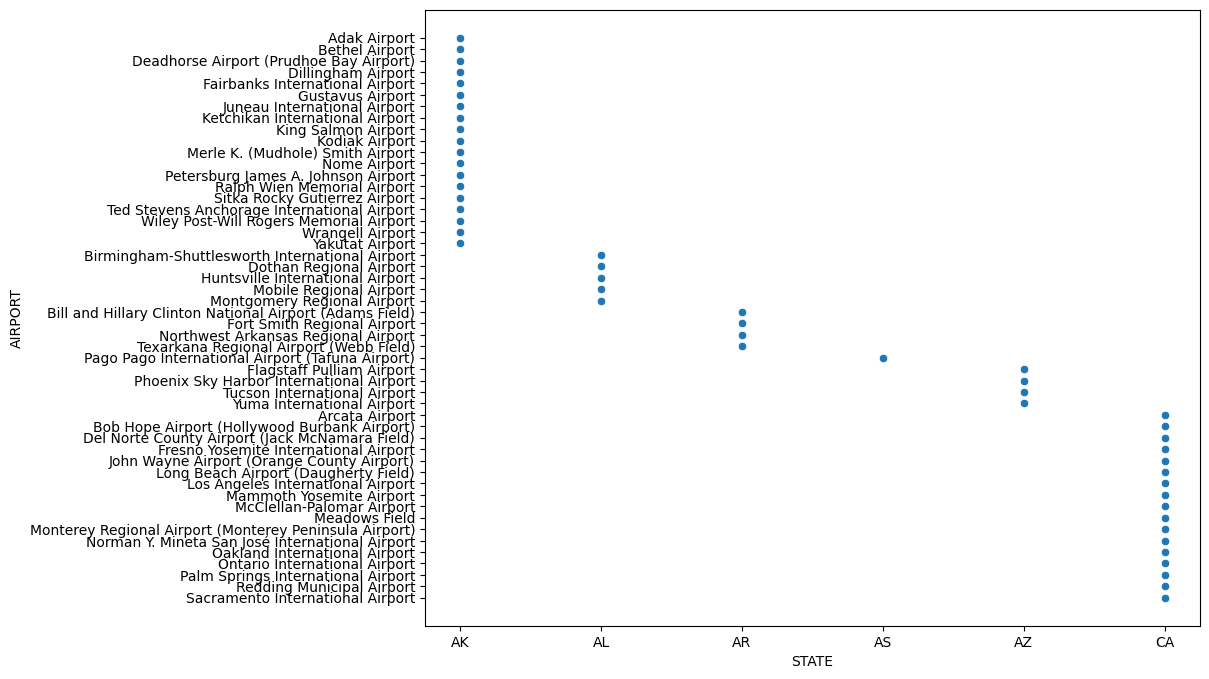

In [429]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=avg.head(50),x='STATE',y='AIRPORT')

## Insight Generation
Analyze which states have the most international airports (based on 'COUNTRY' column).
Write 3-4 sentences summarizing your findings.

In [391]:
Airport_Count=df.groupby(['STATE','COUNTRY'])['AIRPORT'].value_counts().reset_index()

<Axes: xlabel='STATE', ylabel='AIRPORT'>

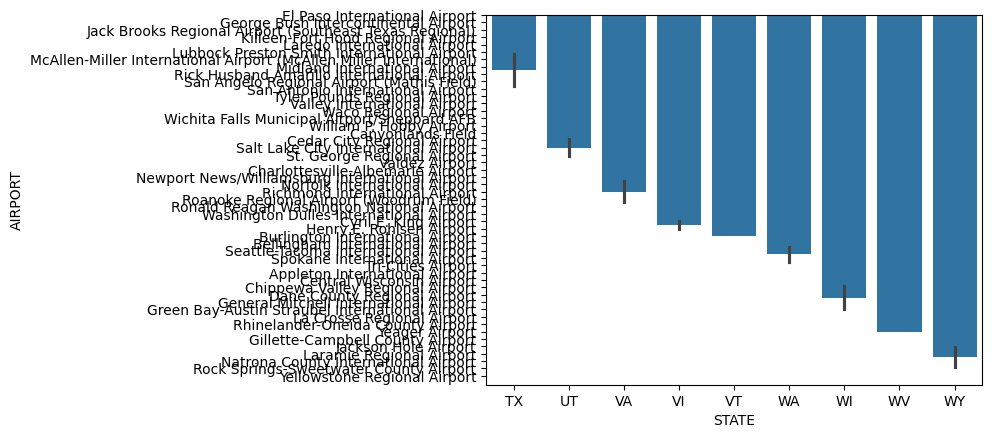

In [421]:
sns.barplot(data=Airport_Count.tail(50),x='STATE',y='AIRPORT')

In [411]:
Airport_Count.head().sort_values('count')

,STATE,COUNTRY,AIRPORT,count
0,AK,USA,Adak Airport,1
1,AK,USA,Bethel Airport,1
2,AK,USA,Deadhorse Airport (Prudhoe Bay Airport),1
3,AK,USA,Dillingham Airport,1
4,AK,USA,Fairbanks International Airport,1


In [459]:
# WY is the state which has the highest number of Airports
#ONlY Data of USA country is given
# These are the top 5 STATES with Highest Airports
#TX    24
#CA    22
#AK    19
#FL    17
#MI    15

## Section 3: Visualization with Seaborn & Matplotlib

In [462]:
#Plotting Graphs
#Create a bar plot showing the number of airports in each region.
#Plot a histogram of airport latitudes to see the geographic spread.


<Axes: xlabel='STATE'>

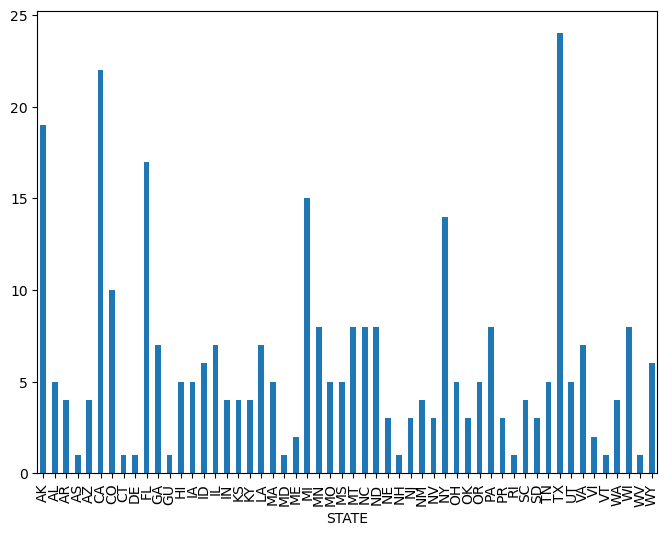

In [472]:
plt.figure(figsize=(8,6))
df.groupby('STATE')['AIRPORT'].count().plot(kind='bar')

<Axes: ylabel='Frequency'>

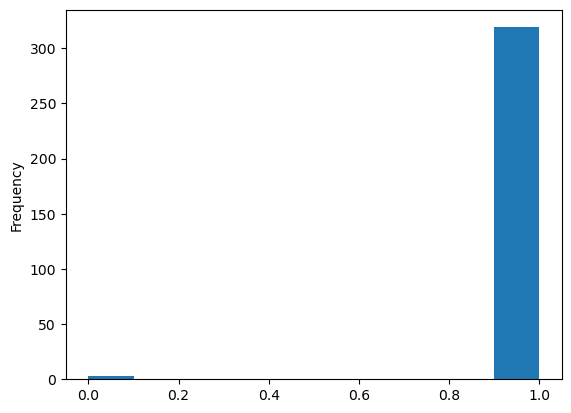

In [486]:
df.groupby('AIRPORT')['LATITUDE'].count().plot(kind='hist')

## Subplots
#Create a subplot with 2 charts:
#A pie chart showing the distribution of airports by country.
#A boxplot of airport longitudes by state.


In [489]:
pie=df.groupby('COUNTRY')['AIRPORT'].value_counts()

In [509]:
box=df.groupby('STATE')['LONGITUDE'].value_counts()

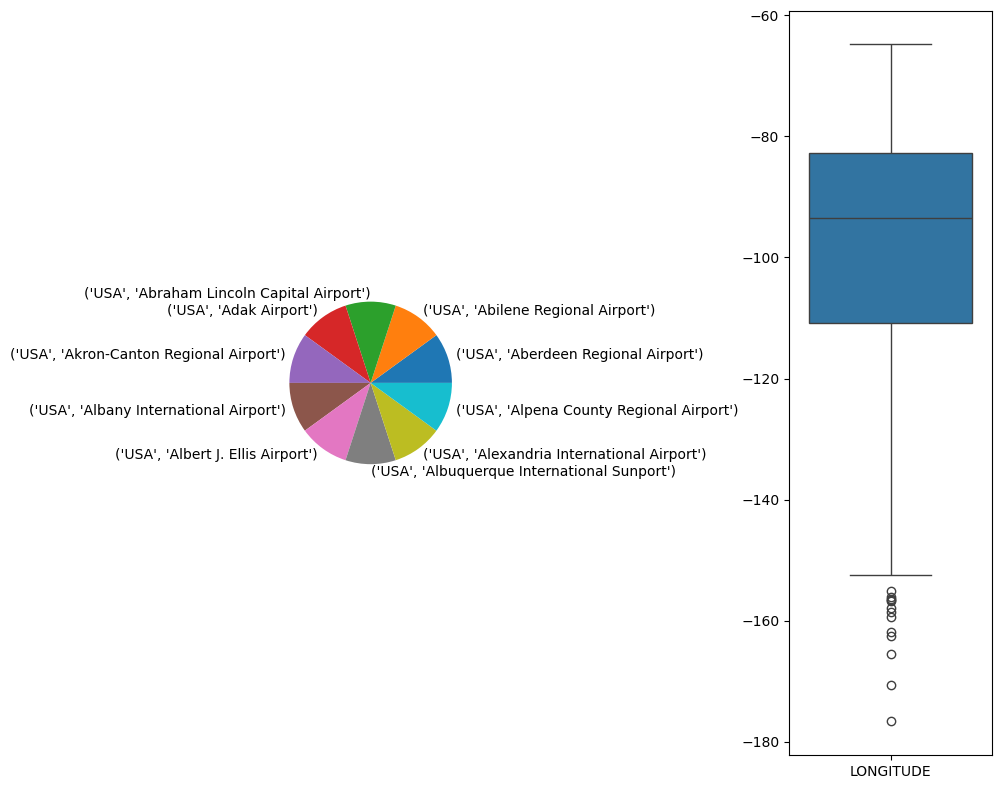

In [523]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.pie(x=pie.head(10),labels=pie.index[:10])
plt.subplot(1,2,2)
sns.boxplot([df['AIRPORT'],df['LONGITUDE']])
plt.tight_layout()